## **Importing required libraries/packages** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import time for training details
from time import time
t0 = time()

import warnings
warnings.filterwarnings('ignore')

/home/nickdn/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Importing and Reading the Dataset**

In [3]:
df_heart= pd.read_csv("../data/heart.csv")

In [4]:
df_heart_row_count, df_heart_column_count=df_heart.shape
print('Total number of rows:', df_heart_row_count)
print('Total number of columns:', df_heart_column_count)

Total number of rows: 303
Total number of columns: 14


## **What does this dataset contain?**

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Checking for any missing values**

In [8]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df_heart.head().iloc[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
df_heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

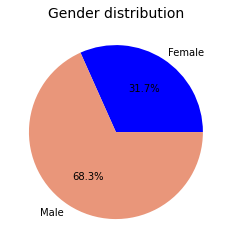

In [12]:
# check gender distribution in the dataset
gender_dist = df_heart.groupby('sex')[['sex']].count()
colors_list = ['blue', 'darksalmon']
plt.pie(gender_dist['sex'], labels = ['Female','Male'], autopct = '%1.1f%%', colors = colors_list)
plt.title("Gender distribution",color = 'black', fontsize = '14')
plt.show()

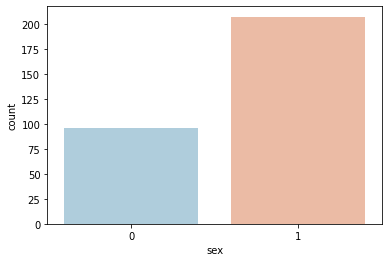

In [13]:
#Getting an idea about the distribution of gender 
p = sns.countplot(data=df_heart, x = 'sex', palette='RdBu_r')

## **Effect of different attributes on target outcome**

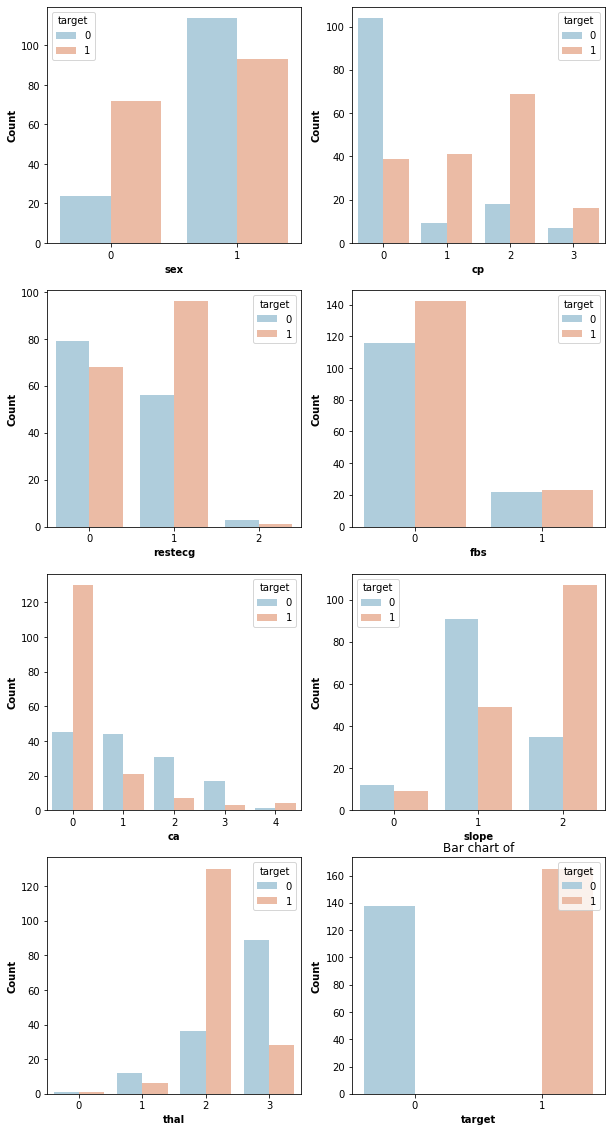

In [14]:
df_ht = ['sex','cp','restecg','fbs','ca','slope','thal', 'target']

fig, axs = plt.subplots(4, 2, figsize=(10,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_ht):
    sns.countplot(x=col_name, data=df_heart, ax=axs[i], hue =df_heart['target'], palette= 'RdBu_r')
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')

## **Plotting correlation map for features**

<AxesSubplot:title={'center':'Correlation map for variables'}>

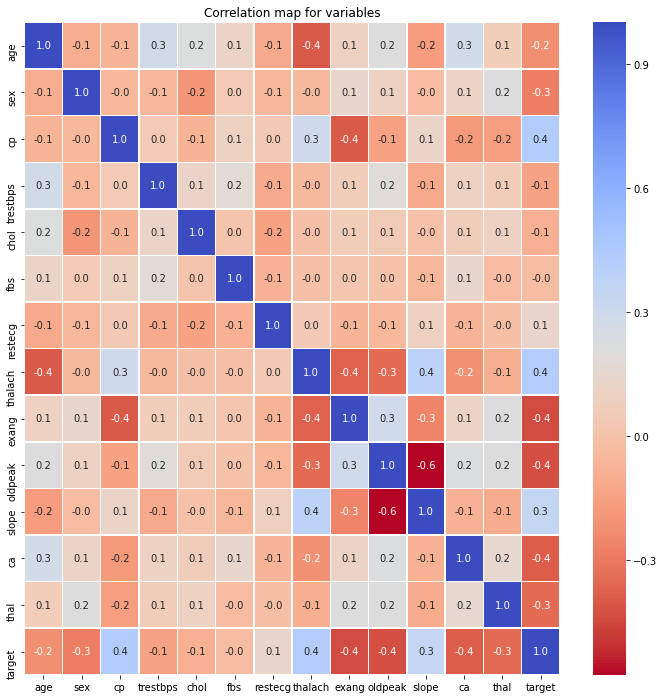

In [15]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(df_heart.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="coolwarm_r")

## **Plots to understand the distribution of the data**

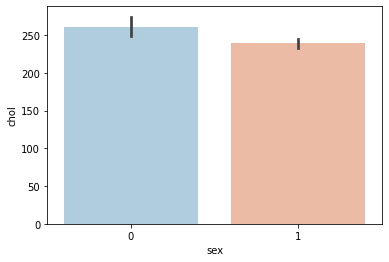

In [16]:
#Getting an idea about the distribution of gender with cholestrol 
p = sns.barplot(data=df_heart, x = 'sex',y='chol', palette='RdBu_r')

In [17]:
cp_dist = pd.DataFrame(df_heart.groupby(by=['sex','target','cp'],axis=0)['age'].count())
cp_dist.columns = ['Total Count']
cp_dist.index.names = ['Gender','Heart Disease 0/1','Chest Pain Type']
cp_dist

Total Count
Gender Heart Disease 0/1 Chest Pain Type             
0      0                 0                         21
                         1                          2
                         2                          1
       1                 0                         18
                         1                         16
                         2                         34
                         3                          4
1      0                 0                         83
                         1                          7
                         2                         17
                         3                          7
       1                 0                         21
                         1                         25
                         2                         35
                         3                         12

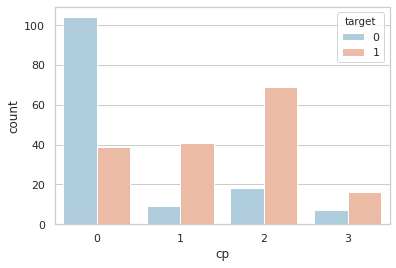

In [18]:
sns.set(style="whitegrid")
p = sns.countplot(data=df_heart, x = 'cp', hue='target', palette='RdBu_r')

## **More plots to understand the distribution of the data**

Text(0.5, 1.0, 'Resting Blood pressure value')

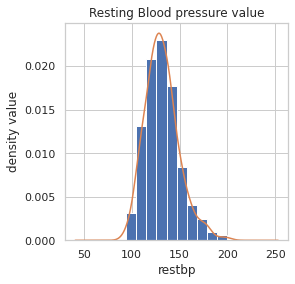

In [19]:
df_heart['trestbps'].plot(kind='hist',density=True,figsize=(4,4))
df_heart['trestbps'].plot(kind='density')
plt.xlabel('restbp')
plt.ylabel('density value')
plt.title('Resting Blood pressure value')

Text(0.5, 1.0, 'ca')

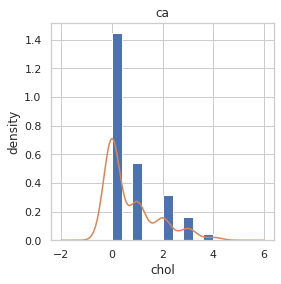

In [20]:
df_heart['ca'].plot(kind='hist',density=True,figsize=(4,4))
df_heart['ca'].plot(kind='density')
plt.xlabel('chol')
plt.ylabel('density')
plt.title('ca')

## **80–20 split for the dataset to create training and test sets**

In [21]:
#Defining X and y
X = df_heart.drop(['target'], axis=1)
y = df_heart['target']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (242, 13)
y_train: (242,)
X_test: (61, 13)
y_test: (61,)


In [39]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


## **Applying machine learning algorithms**

Random Forest Classifier Accuracy: 85.24590163934425 %
Training time 0.458


<AxesSubplot:>

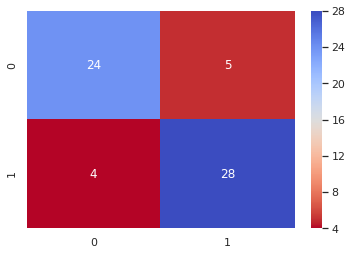

In [22]:
# 1. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
rf_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

Gaussian Naïve Bayes Accuracy: 86.88524590163934 %
Training time 0.009


<AxesSubplot:>

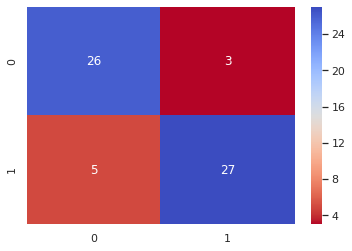

In [23]:
#2. Gaussian Naive Bayes Classifier
t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)
gnb_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Gaussian Naïve Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', gnb_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

Decision Tree Accuracy: 81.9672131147541 %
Training time 0.184


<AxesSubplot:>

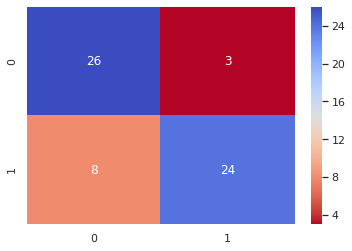

In [24]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
dt_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', dt_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

kNN Accuracy: 65.57377049180327 %
Training time 0.365


<AxesSubplot:>

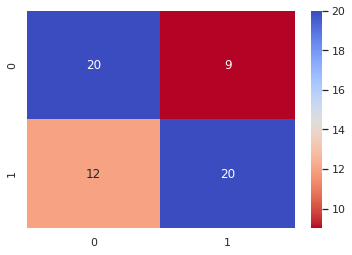

In [25]:
#kNN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
knn_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', knn_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

SVM Accuracy: 70.49180327868852 %
Training time 0.558


<AxesSubplot:>

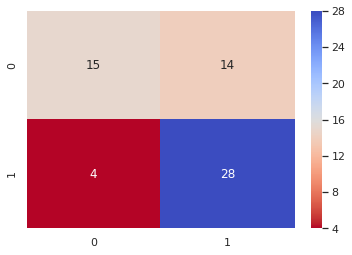

In [26]:
#Support Vector Machines trial
import sys, os

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)
svm_time=(round(time() - t0, 3))
# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', svm_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="coolwarm_r")

## **Visualizing Accuracies for all ML Algorithms**

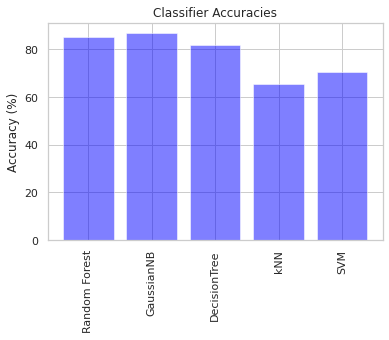

In [27]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_knn, acc_svm]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [28]:
#printing top three accuracies with training time

print('Decision Tree:', acc_dt,'%','with', dt_time,'s')
print('Random Forest:', acc_rf,'%','with', rf_time,'s')
print('GaussianNB:',acc_gnb,'%','with', gnb_time,'s')

Decision Tree: 81.97 % with 0.184 s
Random Forest: 85.25 % with 0.458 s
GaussianNB: 86.89 % with 0.009 s


In [29]:
# importing the model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating list of tuple wth model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))

## **Cross Validation**

In [30]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=42, shuffle=True)
kf.get_n_splits(X)
# print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

('DT', 73.55)
('RF', 80.58)
('GNB', 80.16)


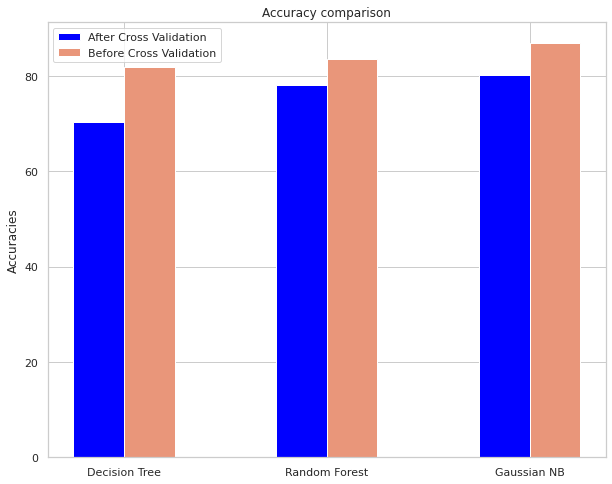

In [31]:
# Plotting all accuracies together for comparison
# using the values for accuracies from previous steps
# these accuracies might vary slightly with each run. Hence,these need to be updated here before plotting

labels = ['Decision Tree', 'Random Forest','Gaussian NB']
NoCV =[81.97, 83.61,86.89] # accuracy before Cross Validation
CV=[70.25, 78.09, 80.16] # accuracy after Cross Validation 

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(10,8)) 
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='blue')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='darksalmon')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='best')
plt.show()

In [32]:
#splitting dataframe to create a new dataframe & test algorithm for female group separately

# on basis of column value for gender
# using dataframe.groupby() function to create dataframe df_women
df_women = df_heart[df_heart['sex'] == 0]

In [33]:
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 2 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       96 non-null     int64  
 1   sex       96 non-null     int64  
 2   cp        96 non-null     int64  
 3   trestbps  96 non-null     int64  
 4   chol      96 non-null     int64  
 5   fbs       96 non-null     int64  
 6   restecg   96 non-null     int64  
 7   thalach   96 non-null     int64  
 8   exang     96 non-null     int64  
 9   oldpeak   96 non-null     float64
 10  slope     96 non-null     int64  
 11  ca        96 non-null     int64  
 12  thal      96 non-null     int64  
 13  target    96 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 11.2 KB


In [34]:
print (df_women)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
2     41    0   1       130   204    0        0      172      0      1.4   
4     57    0   0       120   354    0        1      163      1      0.6   
6     56    0   1       140   294    0        0      153      0      1.3   
11    48    0   2       130   275    0        1      139      0      0.2   
14    58    0   3       150   283    1        0      162      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
289   55    0   0       128   205    0        2      130      1      2.0   
292   58    0   0       170   225    1        0      146      1      2.8   
296   63    0   0       124   197    0        1      136      1      0.0   
298   57    0   0       140   241    0        1      123      1      0.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
2        2   0     2       1  
4        2   0     2     

In [35]:
print('df_women:', df_women.shape)

df_women: (96, 14)


In [36]:
#Defining X and y
Xw = df_women.drop(['target'], axis=1)
yw = df_women['target']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
Xw_train, Xw_test , yw_train , yw_test = train_test_split(Xw,yw,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('Xw_train:', Xw_train.shape)
print('yw_train:', yw_train.shape)
print('Xw_test:', Xw_test.shape)
print('yw_test:', yw_test.shape)

Xw_train: (76, 13)
yw_train: (76,)
Xw_test: (20, 13)
yw_test: (20,)


Gaussian Naive Bayes Accuracy: 90.0 %
Training time 0.005


<AxesSubplot:>

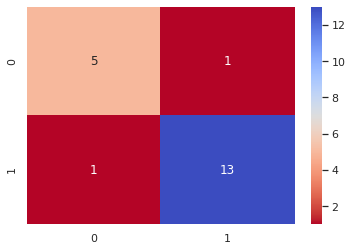

In [37]:
#Gaussian Naive Bayes Classifier
t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(Xw_train, yw_train)

# predict the response
yw_pred = gnb.predict(Xw_test)
acc_gnb = round(gnb.score(Xw_test,yw_test) * 100, 2)
gnb_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Gaussian Naive Bayes Accuracy:",metrics.accuracy_score(yw_test, yw_pred)*100,"%")
print('Training time', gnb_time)
cm = pd.DataFrame(confusion_matrix(yw_test, yw_pred))
sns.heatmap(cm, annot=True, cmap="coolwarm_r")